
* Student name: Charles Ondieki Otwori
* Student pace: Part-time
* Scheduled project review date/time: December 23, 2024
* Instructor name: Daniel Ekale 
* Blog post URL
* Tableau visualization URL

 ## 1. Project overview
SyriaTel is telecommunication company that is interested in reducing the number of customer churn/attrition to reduce loss of revenue. The project will enable the reduction of churn through analytics of historical data and development of machine learning models to predict customers who are likely to churn and develop a mitigation strategy.

## 2. Business and Data understanding
Telecom companies experience customer churn/attrition when customers voluntarily cease their relationship with the company. This leads to financial loss due to reduction in revenue and loss of market share. It is more expensive to acquire a new customer than to main existing ones. During churn the company also loses the future revenue from the customer and the resources spent to acquire the customer. Thus, reducing profitability.Beyond financial loss, high customer churn can indicate a deeper problem with the company in terms of customer service, product appeal or quality of processes. This can erode the company's reputation and further erode the market share.

### The objective of the project is to predict customer churn using public dataset with customer usage patterns and if the customer has churned or not.
* Analytic of churn will provide insights on why customers churn and will help in identifying customers who are likely to leave so that a targeted strategy can be developed to convince them to stay

* The Stakeholder audience for the project is SyriaTel telecommunication company executives from marketing, sales and innovations departments.

### The predictors (features) include the following
* account length
* international plan
* voice mail plan
* number of voice mail messages
* total day minutes used
* day calls made
* total day charge
* total evening minutes
* total evening calls
* total evening charge
* total night minutes
* total night calls
* total night charge
* total international minutes used
* total international calls made
* total international charge
* number customer service calls made

### Target Variable:
Churn; If the customer has churned (1 = yes; 0 = no)
3. Modelling
4. Evaluation
5. Conclusion

## 3. Data Preparation


### Loading Python packages ###

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, RocCurveDisplay, accuracy_score, confusion_matrix, classification_report

###  Data Loading ###

In [2]:
# loading the CSV data to pandas data frame
df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')

### Data Understanding 

In [3]:
# Finding the number of columns and rowa in the data set
df.shape

(3333, 21)

In [4]:
# checking the first 5 rows of the data set
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# checking the last 5 rows of the data set
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
# checking the summary information of the data set in terms of columns, missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Dropping  phone number Column which will not be used in the modelling
df= df.drop( columns= ['phone number'], axis=1) 

In [8]:
# printing all the column names 
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [9]:
# printing the unique values in all the columns 

for column in df.columns:
    print (column,df[column].unique())
    print ('-'*80)

state ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
--------------------------------------------------------------------------------
account length [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  

In [10]:
# Identify categorical and numerical columns
categorical_features = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'bool']
numerical_features = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype.name == 'float64']

# Create separate DataFrames for categorical and numerical columns
categorical_df = df[categorical_features]
numerical_df = df[numerical_features]

In [11]:
categorical_df.head()

,state,international plan,voice mail plan,churn
0,KS,no,yes,False
1,OH,no,yes,False
2,NJ,no,no,False
3,OH,yes,no,False
4,OK,yes,no,False


In [12]:
# checking the Class distribution of the Target column 
churn_counts = df['churn'].value_counts()

# Calculate the percentage of each value
churn_percentage = df['churn'].value_counts(normalize=True) * 100

print(churn_counts)
print('-'*30)
print(churn_percentage)

churn
False    2850
True      483
Name: count, dtype: int64
------------------------------
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


In [13]:
# checking duplicate values
df.duplicated().sum()

0

In [14]:
# Checking null values 
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Insights 
1. Dropped the Phone number columns because it will not be used in the model 
2. No missing values 
3. No duplicated values
4. Class imbalance in the target column (churn) with 85.5% of False and 14.5% of True. This can be addressed by using oversampling techniques.

## 4. Exploratory Data Analysis ##

In [15]:
df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [16]:
# Checking the descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### Numerical features analysis ###

Distribution of the numerical features

In [17]:
def plot_histogram (df,column_name):
  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde = True)
  plt.title (f'Distribution of {column_name}')

# calculate  the mean and median values for the columns
  col_mean = np.mean(df[column_name].mean())
  col_median = np.median(df[column_name].median())

# Vertical lines for mean and median label='Mean')
  plt.axvline(col_median, color='red', linestyle= '-', label='Median')
  plt.axvline(col_mean, color='green', linestyle= '--', label='Mean')

  plt.legend(loc='best')
  plt.show()

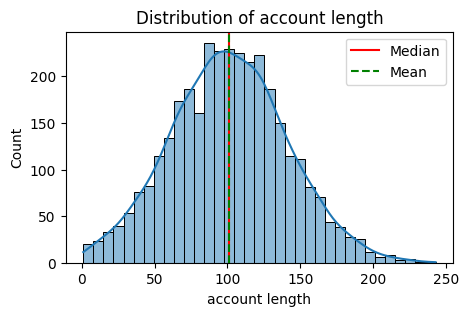

In [18]:
plot_histogram(df,'account length')

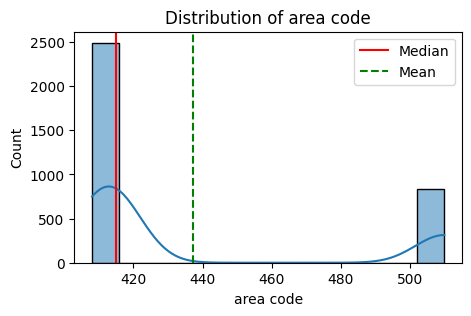

In [19]:
plot_histogram(df,'area code')

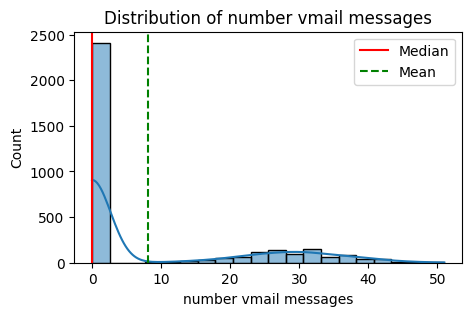

In [20]:
plot_histogram(df,'number vmail messages')

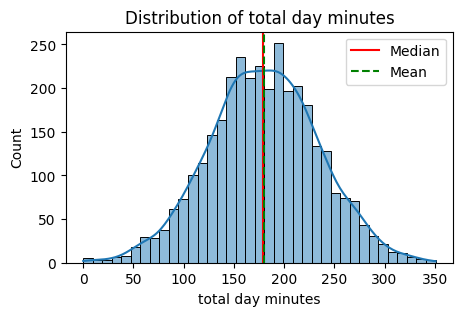

In [21]:
plot_histogram(df,'total day minutes')

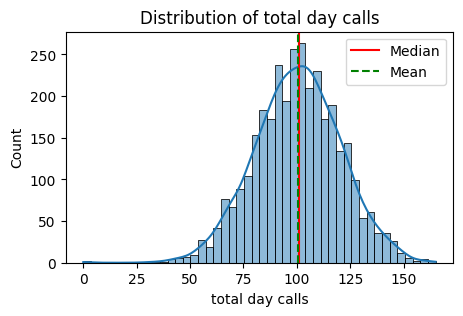

In [22]:
plot_histogram(df,'total day calls')

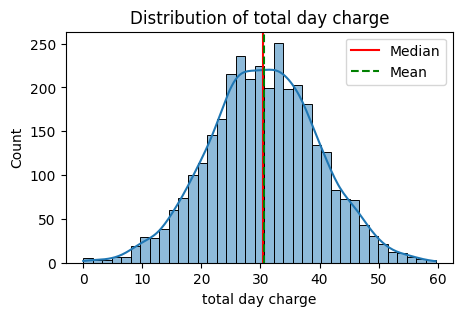

In [23]:
plot_histogram(df,'total day charge')

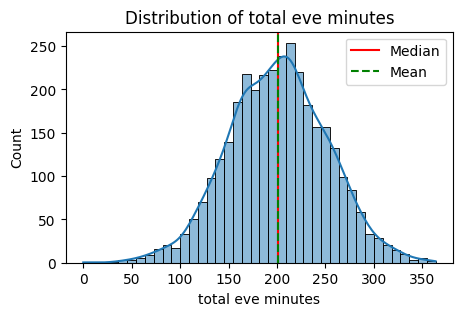

In [24]:
plot_histogram(df,'total eve minutes')

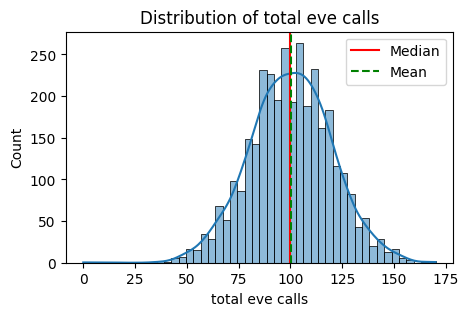

In [25]:
plot_histogram(df,'total eve calls')

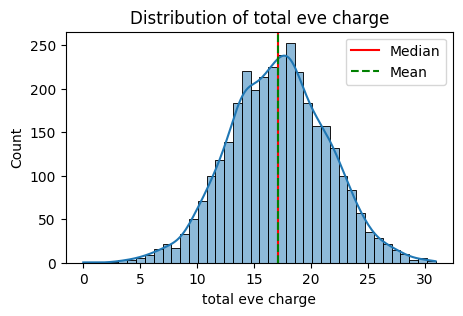

In [26]:
plot_histogram(df,'total eve charge')

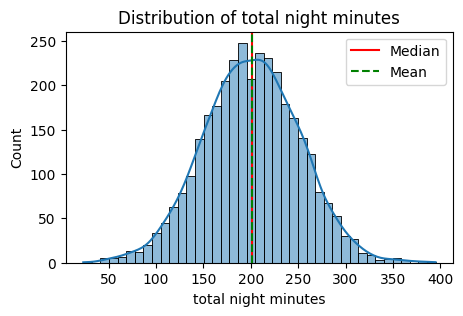

In [27]:
plot_histogram(df,'total night minutes')

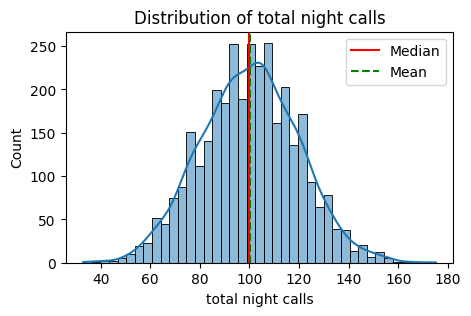

In [28]:
plot_histogram(df,'total night calls')

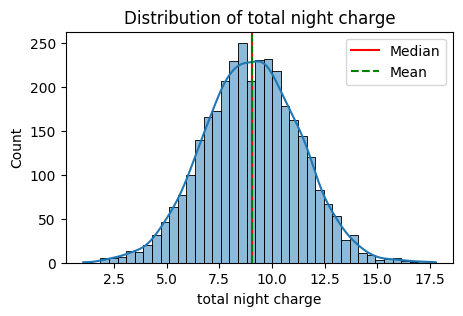

In [29]:
plot_histogram(df,'total night charge')

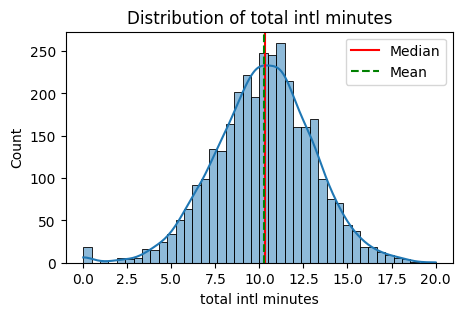

In [30]:
plot_histogram(df,'total intl minutes')

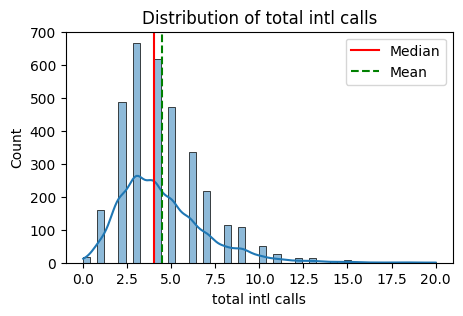

In [31]:
plot_histogram(df,'total intl calls')

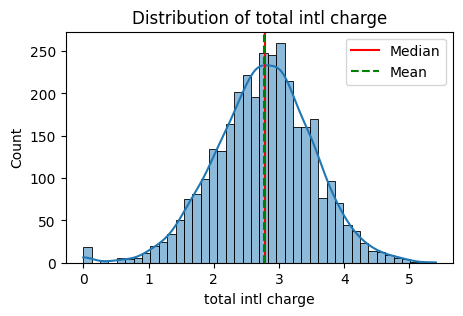

In [32]:
plot_histogram(df,'total intl charge')

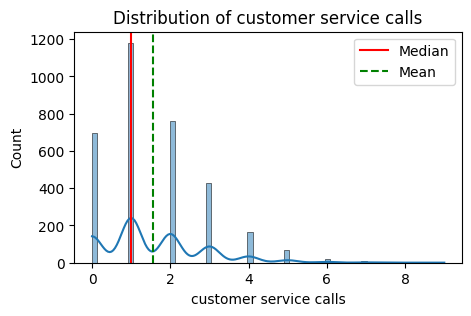

In [33]:
plot_histogram(df,'customer service calls')

#### Insights from the histograms
*  Several features have a normal distribution : account length, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charges, Total night minutes, Total night calls, Total night charges, Total intel charges, Total intel calls
* Left Skew Area code, Number of voice mail messages, Total international calls ,Customer service calls

#### Box plot  for numerical features ####

In [34]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.ylabel(column_name)
    plt.show

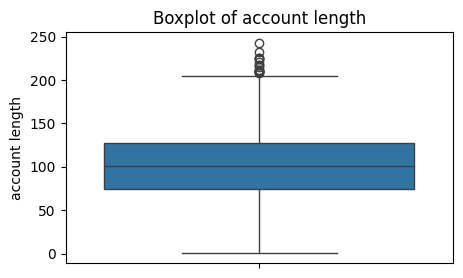

In [35]:
plot_boxplot(df,'account length')

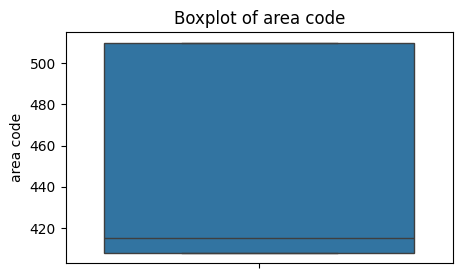

In [36]:
plot_boxplot(df,'area code')

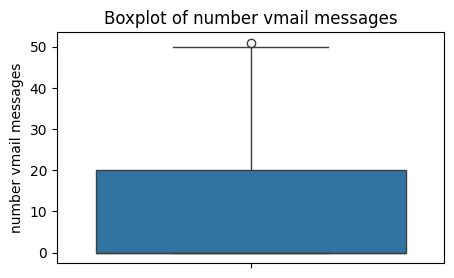

In [37]:
plot_boxplot(df,'number vmail messages')

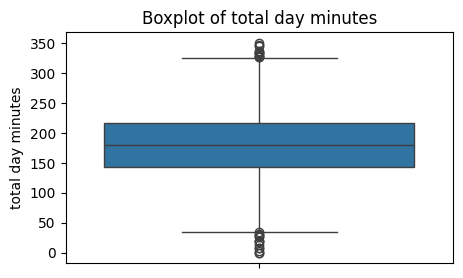

In [38]:
plot_boxplot(df,'total day minutes')

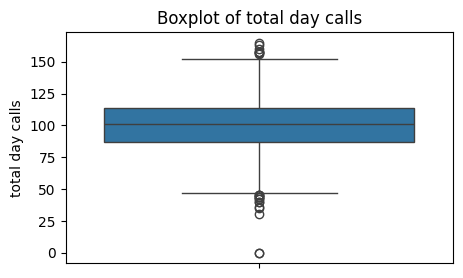

In [39]:
plot_boxplot(df,'total day calls')

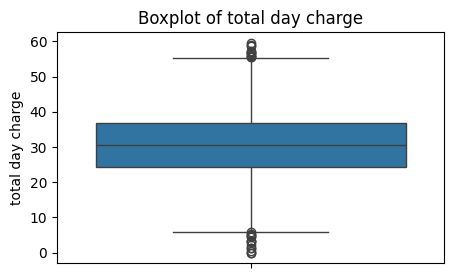

In [40]:
plot_boxplot(df,'total day charge')

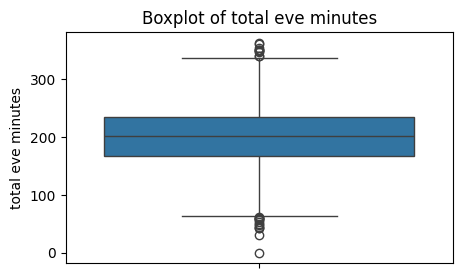

In [41]:
plot_boxplot(df,'total eve minutes')

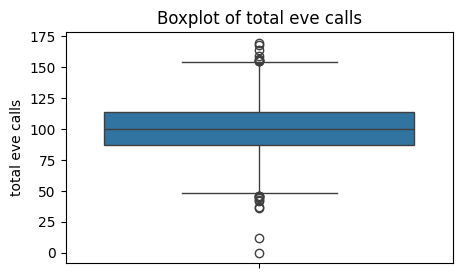

In [42]:
plot_boxplot(df,'total eve calls')

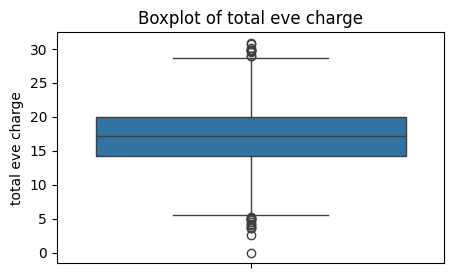

In [43]:
plot_boxplot(df,'total eve charge')

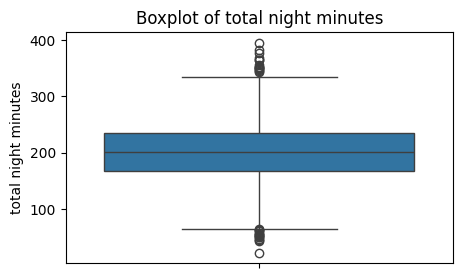

In [44]:
plot_boxplot(df,'total night minutes')

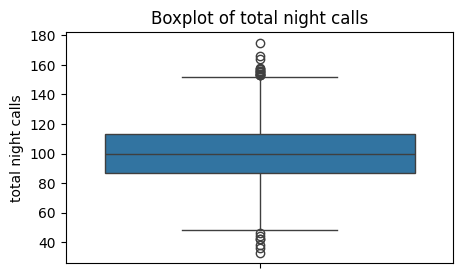

In [45]:
plot_boxplot(df,'total night calls')

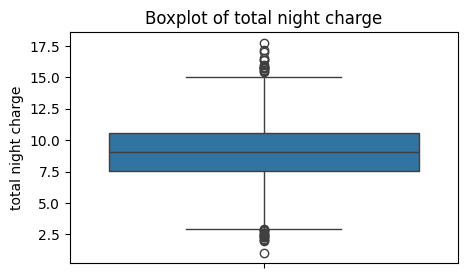

In [46]:
plot_boxplot(df,'total night charge')

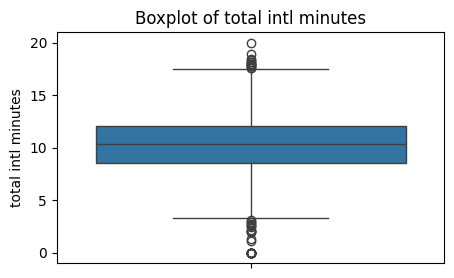

In [47]:
plot_boxplot(df,'total intl minutes')

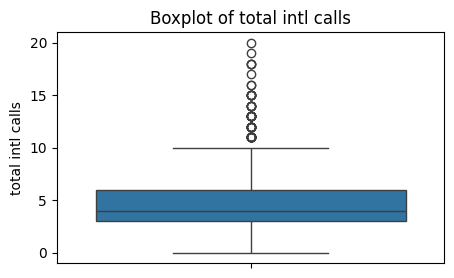

In [48]:
plot_boxplot(df,'total intl calls')

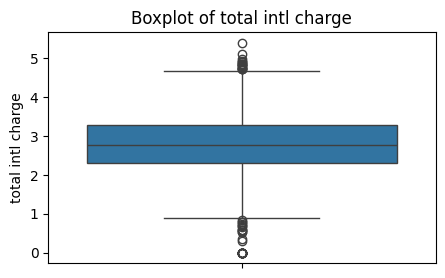

In [49]:
plot_boxplot(df,'total intl charge')

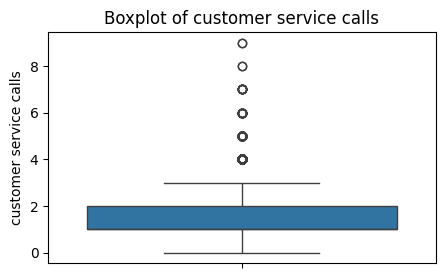

In [50]:
plot_boxplot(df,'customer service calls')

### Insights from the boxplots

* The numerical features have outliers apart from area code, and number of vcall messages

#### Correlation heatmap for numerical features ####

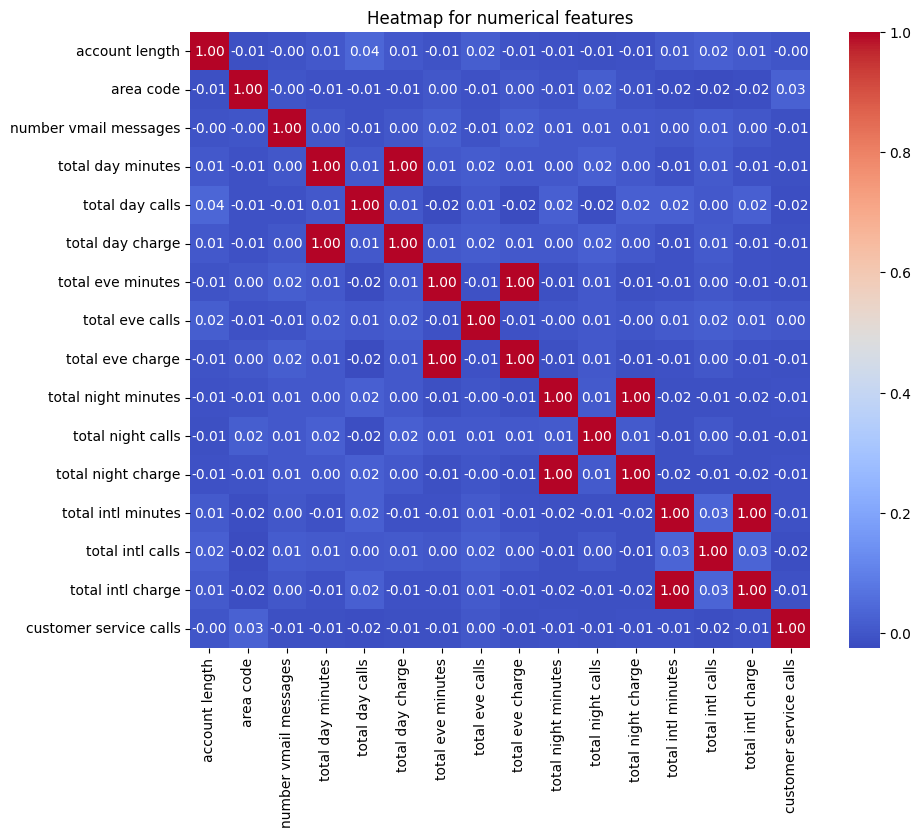

In [51]:
plt.figure(figsize=(10,8 ))
sns.heatmap(numerical_df.corr(),annot= True,cmap='coolwarm', fmt='.2f')
plt.title('Heatmap for numerical features')
plt.show()


* The numerical featues have low correlations

### Categorical  features analysis

In [52]:
categorical_df.head()

,state,international plan,voice mail plan,churn
0,KS,no,yes,False
1,OH,no,yes,False
2,NJ,no,no,False
3,OH,yes,no,False
4,OK,yes,no,False


In [53]:
categorical_features

['state', 'international plan', 'voice mail plan', 'churn']

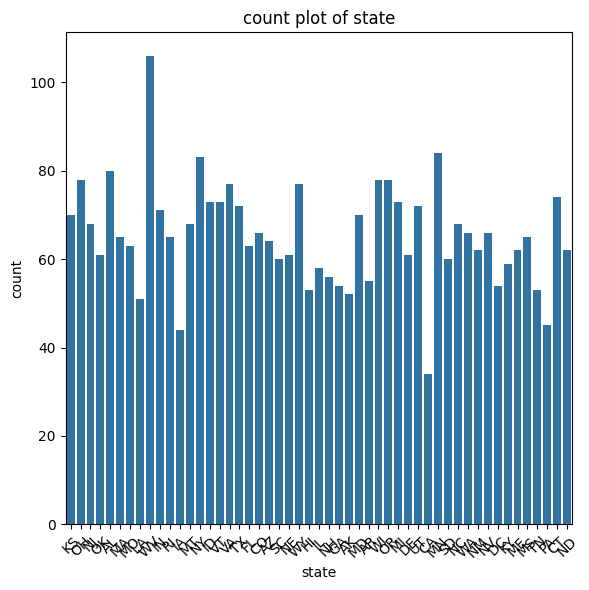

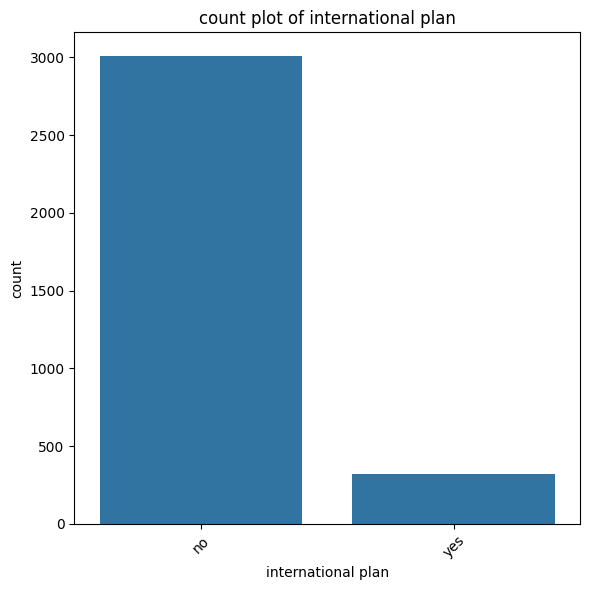

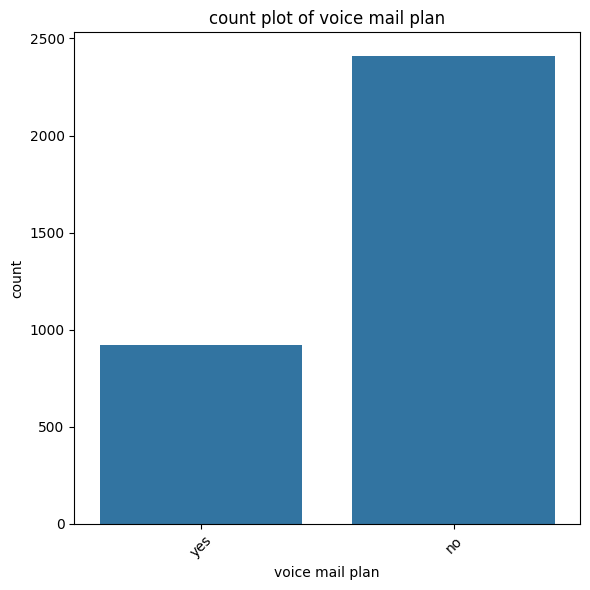

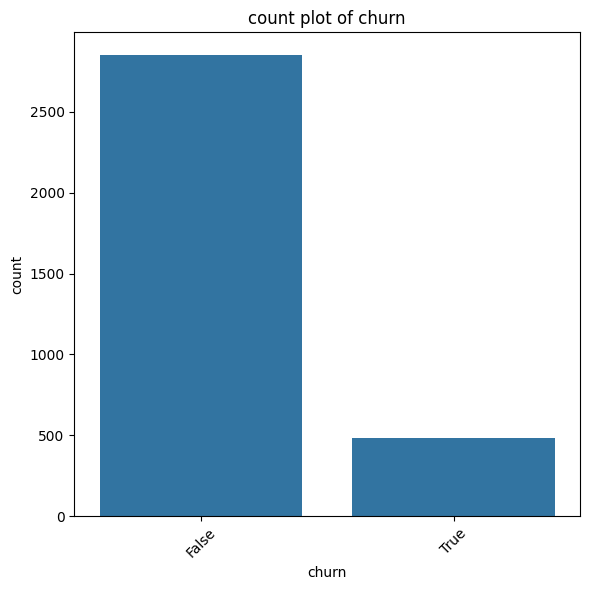

In [54]:
for col in categorical_features:
    plt.figure(figsize=(6,6))
    sns.countplot(x=col, data=categorical_df)
    plt.title(f'count plot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis ticks
    plt.tight_layout()
    plt.show()

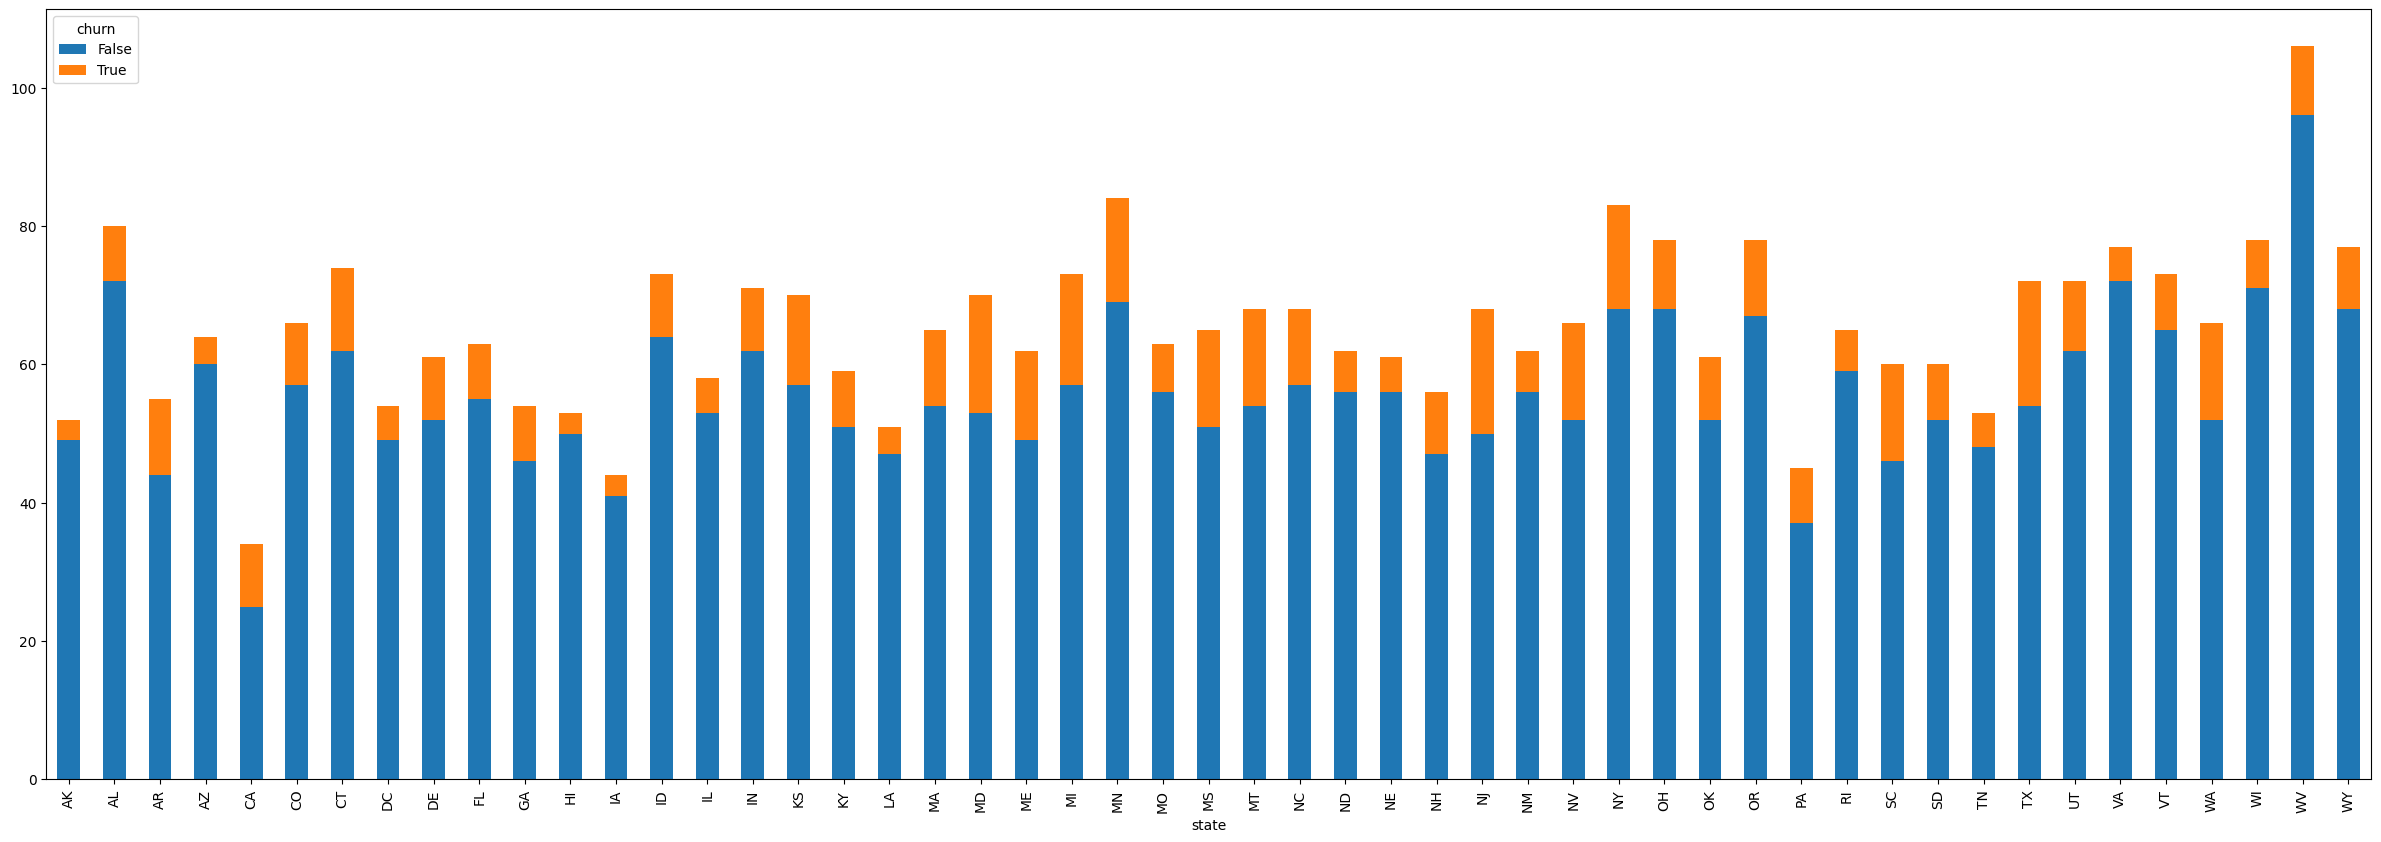

In [55]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10));

## 5. Data Preprocessing 

#### Label encoding of the Target column

In [56]:
df['churn']= df['churn'].astype(int)

In [57]:
df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [58]:
# separate feature and target
X = df.drop(columns=['churn'],axis =1)
y = df['churn']

#### Label encoding for categorical features

In [59]:
# identifying categorical columns and numerical columns
categorical_columns = ['state', 'international plan', 'voice mail plan', 'area code']
numerical_columns = X.columns.difference(categorical_columns)
X_categorical = df[categorical_columns]

In [60]:
# One-Hot Encoding Categorical columns
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity
X_cat_encoded = ohe.fit_transform(X_categorical)
X_cat_encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [61]:
# Retrieve the feature names after encoding for proper labeling
encoded_feature_names = ohe.get_feature_names_out(categorical_columns)

# Convert the encoded data to a DataFrame with appropriate column names
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoded_feature_names, index=df.index)
X_cat_encoded_df.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### Standardization of numerical columns

In [62]:
#Instanciate standardization
scaler = StandardScaler()
X_numerical= scaler.fit_transform(X[numerical_columns])
X_numerical

array([[ 0.67648946, -0.42793202,  1.23488274, ..., -0.46549436,
         0.86602851,  0.86674322],
       [ 0.14906505, -0.42793202,  1.30794844, ...,  0.14782467,
         1.05938994,  1.05857074],
       [ 0.9025285 , -1.1882185 , -0.59175986, ...,  0.19893459,
        -0.75557074, -0.75686906],
       ...,
       [-1.83505538,  0.33235445, -0.59175986, ..., -0.46549436,
        -0.17548645, -0.1774313 ],
       [ 2.08295458,  0.33235445, -0.59175986, ...,  1.88556193,
        -1.22139599, -1.21962822],
       [-0.67974475, -1.1882185 ,  1.23488274, ..., -1.18103324,
         0.80010984,  0.80148231]])

In [63]:
# convert to dataframe 
X_numerical_df = pd.DataFrame(X_numerical, columns= numerical_columns,index=X.index)
X_numerical_df.head(2)

,account length,customer service calls,number vmail messages,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes
0,0.676489,-0.427932,1.234883,0.476643,1.567036,1.566767,-0.055940,-0.070427,-0.07061,-0.601195,-0.085690,-0.085008,-0.465494,0.866029,0.866743
1,0.149065,-0.427932,1.307948,1.124503,-0.334013,-0.333738,0.144867,-0.107549,-0.10808,-0.601195,1.241169,1.240482,0.147825,1.059390,1.058571


#### Combining procesed Data frames 

In [64]:
X_processed = pd.concat([X_cat_encoded_df, X_numerical_df], axis=1)
X_processed

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.566767,-0.055940,-0.070427,-0.070610,-0.601195,-0.085690,-0.085008,-0.465494,0.866029,0.866743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.333738,0.144867,-0.107549,-0.108080,-0.601195,1.241169,1.240482,0.147825,1.059390,1.058571
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.168304,0.496279,-1.573900,-1.573383,0.211534,0.697156,0.703121,0.198935,-0.755571,-0.756869
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.196596,-0.608159,-2.743268,-2.742865,1.024263,-1.306401,-1.303026,-0.567714,-0.078806,-0.078551
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.240090,1.098699,-1.037939,-1.038932,-0.601195,-0.045885,-0.049184,1.067803,-0.276562,-0.276311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.432895,1.299506,0.286880,0.286348,0.617898,-0.125496,-0.120832,-0.874374,1.547188,1.547039
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.942447,-2.264816,-0.938172,-0.938353,-0.194831,-0.231645,-0.228304,1.170023,-0.188670,-0.189297
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018820,-2.114211,1.732349,1.731930,0.617898,1.387123,1.383778,-0.465494,-0.175486,-0.177431
3331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.624778,-0.808966,-0.815203,-0.816080,2.243356,-1.876950,-1.876211,1.885562,-1.221396,-1.219628


## 6. Train and test  data split 

In [65]:
# Split  train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [66]:
print(f'Train data shape: {X_train.shape}')

print(f'Test data shape: {X_test.shape}')

Train data shape: (2666, 69)
Test data shape: (667, 69)


In [67]:
y_train.value_counts()

churn
0    2284
1     382
Name: count, dtype: int64

* There is a significant class imbalance 

#### Handling the class imbalance with SMOTE ( Synthetic Minority Over-sampling Technique)

In [68]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
y_train_bal.value_counts()

churn
0    2284
1    2284
Name: count, dtype: int64

## 7. Logistic Regression 

#### Training Logistc Regression model 

In [69]:
Log_model = LogisticRegression( solver = 'newton-cg', max_iter=2000, random_state= 42,)
Log_model.fit(X_train_bal,y_train_bal)

LogisticRegression(max_iter=2000, random_state=42, solver='newton-cg')

#### Making a prediction

In [70]:
y_pred =Log_model.predict(X_test)

#### Evaluate logistic model 

In [71]:
accuracy= accuracy_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
Report = classification_report(y_test,y_pred)

# Print Model Results with Titles and Separators
print("Logistic Regression Model Evaluation")
print('-' * 80)
print("Accuracy:", accuracy)
print('-' * 80)
print("Confusion Matrix:")
print(confusion)
print('-' * 80)
print("Classification Report:")
print(Report)
print('-' * 80)

Logistic Regression Model Evaluation
--------------------------------------------------------------------------------
Accuracy: 0.7886056971514243
--------------------------------------------------------------------------------
Confusion Matrix:
[[450 116]
 [ 25  76]]
--------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.86       566
           1       0.40      0.75      0.52       101

    accuracy                           0.79       667
   macro avg       0.67      0.77      0.69       667
weighted avg       0.86      0.79      0.81       667

--------------------------------------------------------------------------------


#### Visualization of Logistic regression Model Evaluation 

#####  Logistic Regression Model Confusion Matrix 

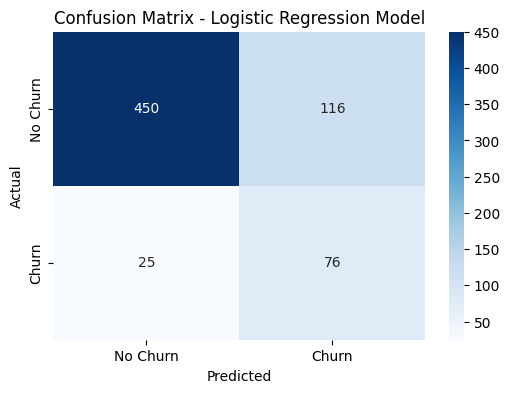

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Logistic Regression model ROC curve 

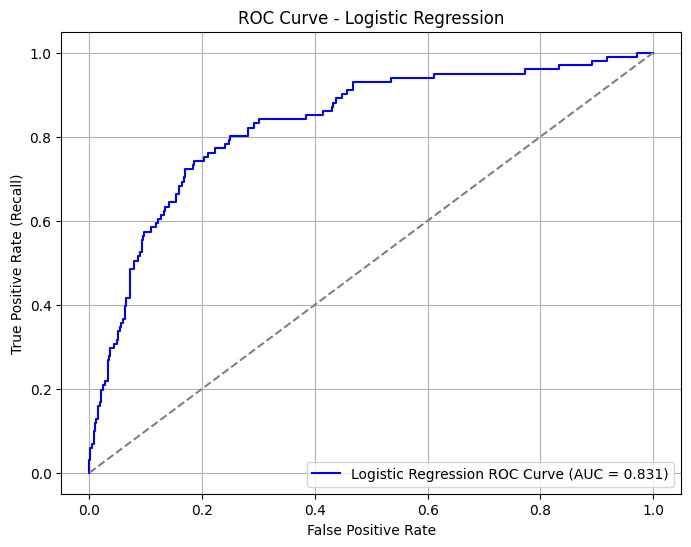

In [73]:
# Calculate the Predicted Probabilities for Positive Class
y_proba_logreg = Log_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (churn)

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg)  # True and false positive rates

# Step 3: Compute ROC-AUC 
roc_auc= roc_auc_score(y_test, y_proba_logreg)

#Plot the ROC curve
roc_auc = roc_auc_score(y_test, y_proba_logreg)
fpr, tpr, _ = roc_curve(y_test, y_proba_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##### Logic Regression Model Precision-Recall Curve

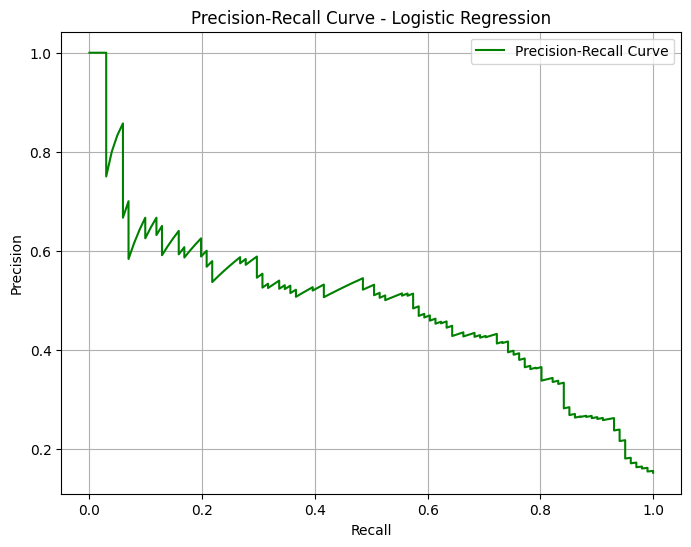

In [74]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_logreg)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

### Interpretation of the Evaluation of the logistic regression model


* The Accuracy score was 0.79 meaning that the model classified correctly 79% of the test sample
* Confusion Matrix
  - 450 (True Negatives) - customers who did not churn and were correctly predicted not to churn 
  - 116 (False Positives) - customers who did not churn but were incorrectly predicted to churn
  - 25 (False Negatives) - customers who churned but were incorrectly predicted not to churn
  - 76 (True Positives) - customers who churned and were correctly predicted to churn
* The model over predicts churn(false positive)  and misses churn cases (false negative) 
* Precision 
    -  class 0 : model predicts non churn correct at 94% of the time
    - class 1 : model predicts churn correct at 40% of the time
    - low precison for churn show model has high false positives 
* Recall
    - class 0 : model predicts non churn correct at 86% of the time
    - class 1 : model predicts churn correct at 75% of the time
    - High recall for churn at the expense of precision
* F1-Score 
    - weighted average of precision and recall, taking into account both classes
    - 52%  for churn 

The Results are due to class imbalance of the test sample, needs further test models e.g XGBoost and Random Forest which can handle the class imbalance bettter 

##  8. XGBoost Classifier

#### Tuning the XGBoot Classifier 

In [75]:
xgboot = XGBClassifier(use_label_encoder= False, eval_metric ='logloss',random_state = 42 )
# eval_metric is a performance metric for ebvaluation during training
# random_state ensures reproducibility 

#### Parameters Tuning for XGBoost model 

In [76]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300], # number of boosting rounds(trees)
    'max_depth': [3, 5, 7],           # The maximun  depth of each tree
    'learning_rate': [0.01, 0.1, 0.2], # Step-size shrinkage to prevent overfitting
    'subsample': [0.8, 1.0],          #random sample for growing tree
    'colsample_bytree': [0.8, 1.0]    # Fraction of features to randomly sample for each tree
}

#### Grid Search  cross validation for XGBoost 

In [77]:
grid_search_xgb = GridSearchCV(xgboot, param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_bal, y_train_bal) # training XGBoost model on SMOTE balanced training data 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\ondie\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [01:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=2)

#### XGBoost Model prediction 

In [78]:
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

#### XGBoost Model Evaluation 

In [79]:
Accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
Report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]


print("XGBoost Results")
print('-' * 80)
print("Best Parameters:", grid_search_xgb.best_params_)
print("Accuracy:", Accuracy_xgb)
print('-' * 80)
print("Confusion Matrix:\n", confusion_xgb)
print('-' * 80)
print("Classification Report:\n", Report_xgb)
print('-' * 80)
print("ROC AUC Score:", roc_auc_xgb)
print('-' * 80)

XGBoost Results
--------------------------------------------------------------------------------
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.9580209895052474
--------------------------------------------------------------------------------
Confusion Matrix:
 [[558   8]
 [ 20  81]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.91      0.80      0.85       101

    accuracy                           0.96       667
   macro avg       0.94      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667

--------------------------------------------------------------------------------
ROC AUC Score: 0.8939229612007138
--------------------------------------------------------------------------------


### XGBoost model Evaluation Visualization 

#### XGBoost Confusion matrix 

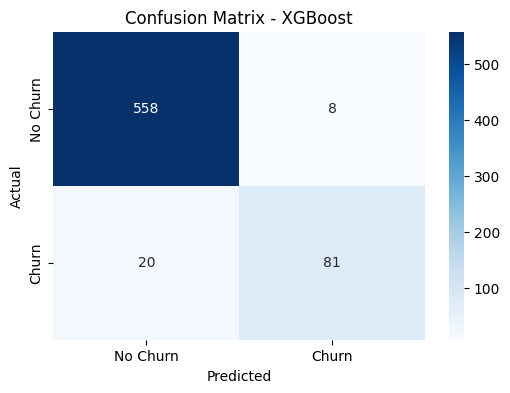

In [80]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### XGBoost ROC curve plot

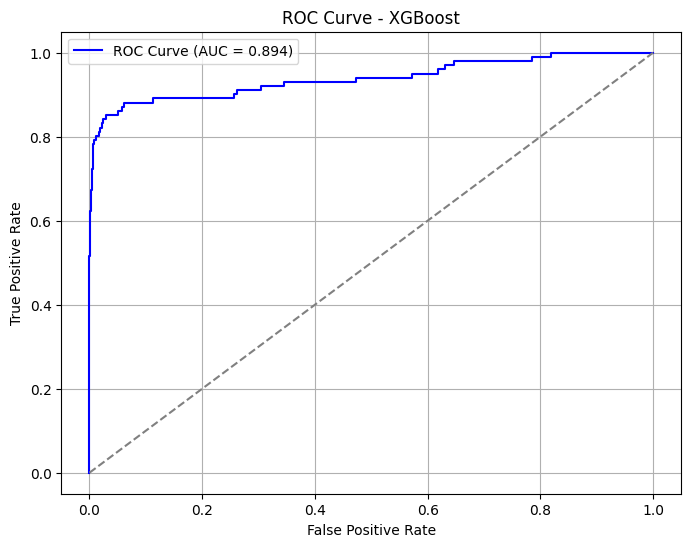

In [81]:
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.3f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.grid(True)
plt.legend()
plt.show()

#### XGBoost Precision Recall curve plot 

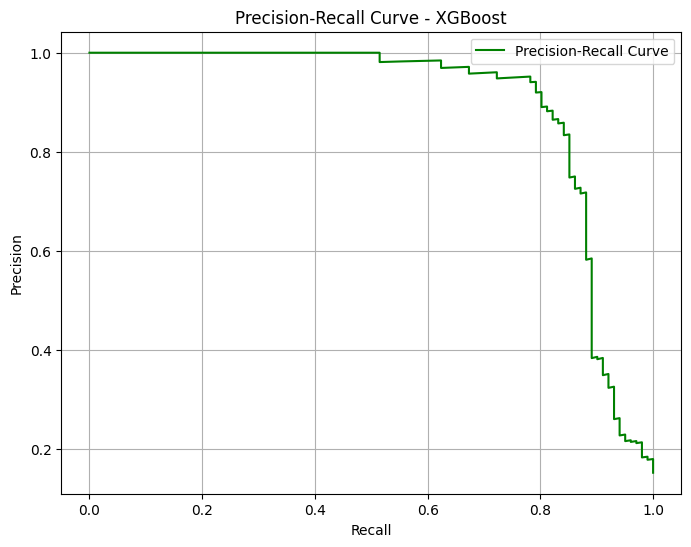

In [82]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.grid(True)
plt.legend()
plt.show()

#### XGBoost Feature importance 

<Figure size 1200x1000 with 0 Axes>

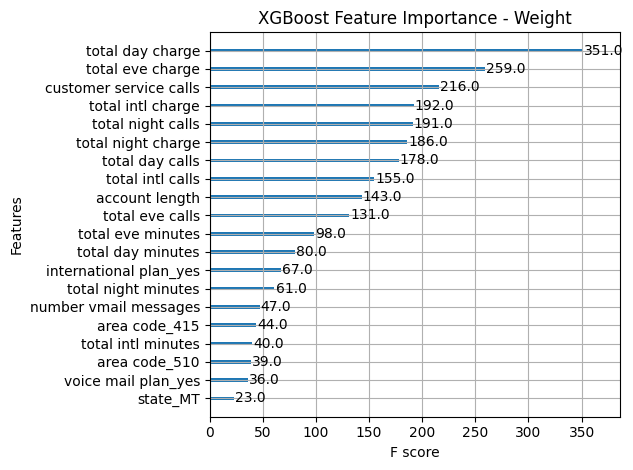

In [83]:
from xgboost import plot_importance
plt.figure(figsize=(12, 10))
plot_importance(best_xgb, importance_type='weight', max_num_features= 20)
plt.title("XGBoost Feature Importance - Weight")
plt.tight_layout()
plt.show()

### Interpretation of the Evaluation of the XGBoost

* The Accuracy score was 0.96 meaning that the model classified correctly 96% of the test sample
* Confusion Matrix
  - 558 (True Negatives) - customers who did not churn and were correctly predicted not to churn 
  - 8 (False Positives) - customers who did not churn but were incorrectly predicted to churn
  - 20 (False Negatives) - customers who churned but were incorrectly predicted not to churn
  - 81 (True Positives) - customers who churned and were correctly predicted to churn 
* Precision 
    - class 0 : model predicts non churn correct at 97% of the time
    - class 1 : model predicts churn correct at 91% of the time
* Recall
    - class 0 : model predicts non churn correct at 99% of the time
    - class 1 : model predicts churn correct at 80% of the time
* F1-Score 
    - weighted average of precision and recall, taking into account both classes
    - 85%  for churn 


## 9. Random Forest Model

#### Defining Random forest model for churn 

In [84]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

#### Hyper parameter Tuning for Random Forest Model

In [85]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],      # Maximum depth of each tree
    'min_samples_split': [2, 5],      # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2]   
     }     # Minimum number of samples for a leaf

#### Grid Search cross validation for Random forest model

In [ ]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_bal, y_train_bal) # training Random forest model on SMOTE balanced data set 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


####  Random Forest model prediction

In [135]:
best_rf_model = grid_search_rf.best_estimator_

#### Random Forest model Prediction on Test data 

In [136]:
y_pred_rf = best_rf_model.predict(X_test)

### Random Forest model Evaluation 

In [137]:
# Evaluation 
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# results 
print ("Random forest results")
print('-' * 80)
print('Best Parameters:',grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print('-' * 80)
print("Confusion Matrix:\n", confusion_rf)
print('-' * 80)
print("Classification Report:\n", classification_report_rf)
print('-' * 80)
print("ROC AUC Score:", roc_auc_rf)

Random forest results
--------------------------------------------------------------------------------
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9460269865067467
--------------------------------------------------------------------------------
Confusion Matrix:
 [[556  10]
 [ 26  75]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.88      0.74      0.81       101

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.94      0.95      0.94       667

--------------------------------------------------------------------------------
ROC AUC Score: 0.8624532064513871


### Random Forest model Evaluation Visualization 

#### Random Forest model confusion matrix plot 

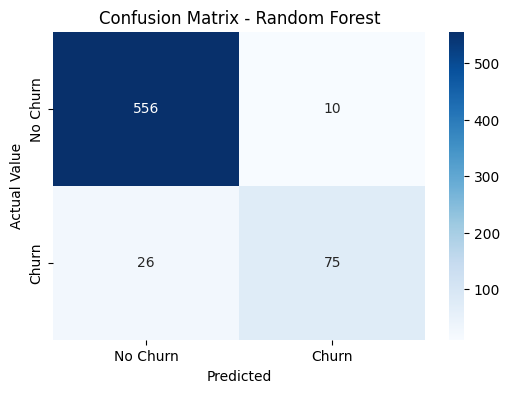

In [138]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

#### Random Forest model Precision recall curve plot

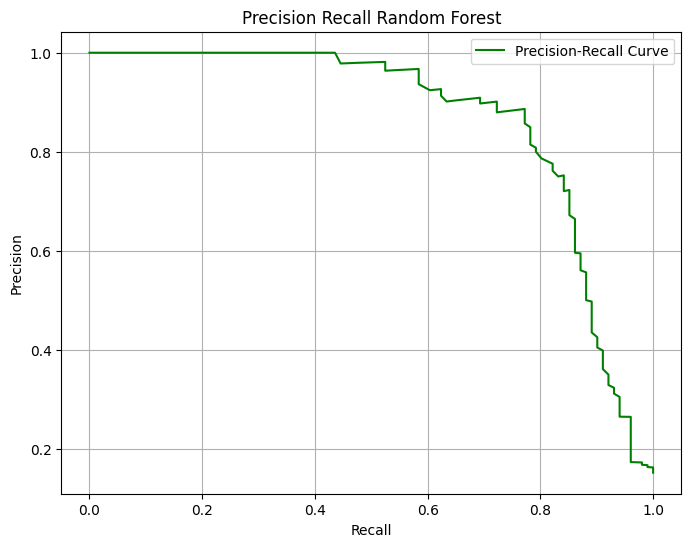

In [139]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.title('Precision Recall Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Random Forest ROC curve plot 

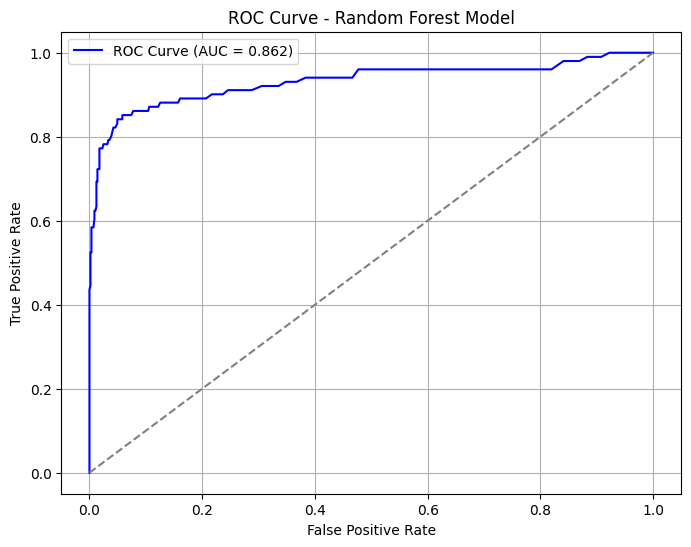

In [140]:
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.3f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title ('ROC Curve - Random Forest Model')
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Random Forest model Feature importance plot 

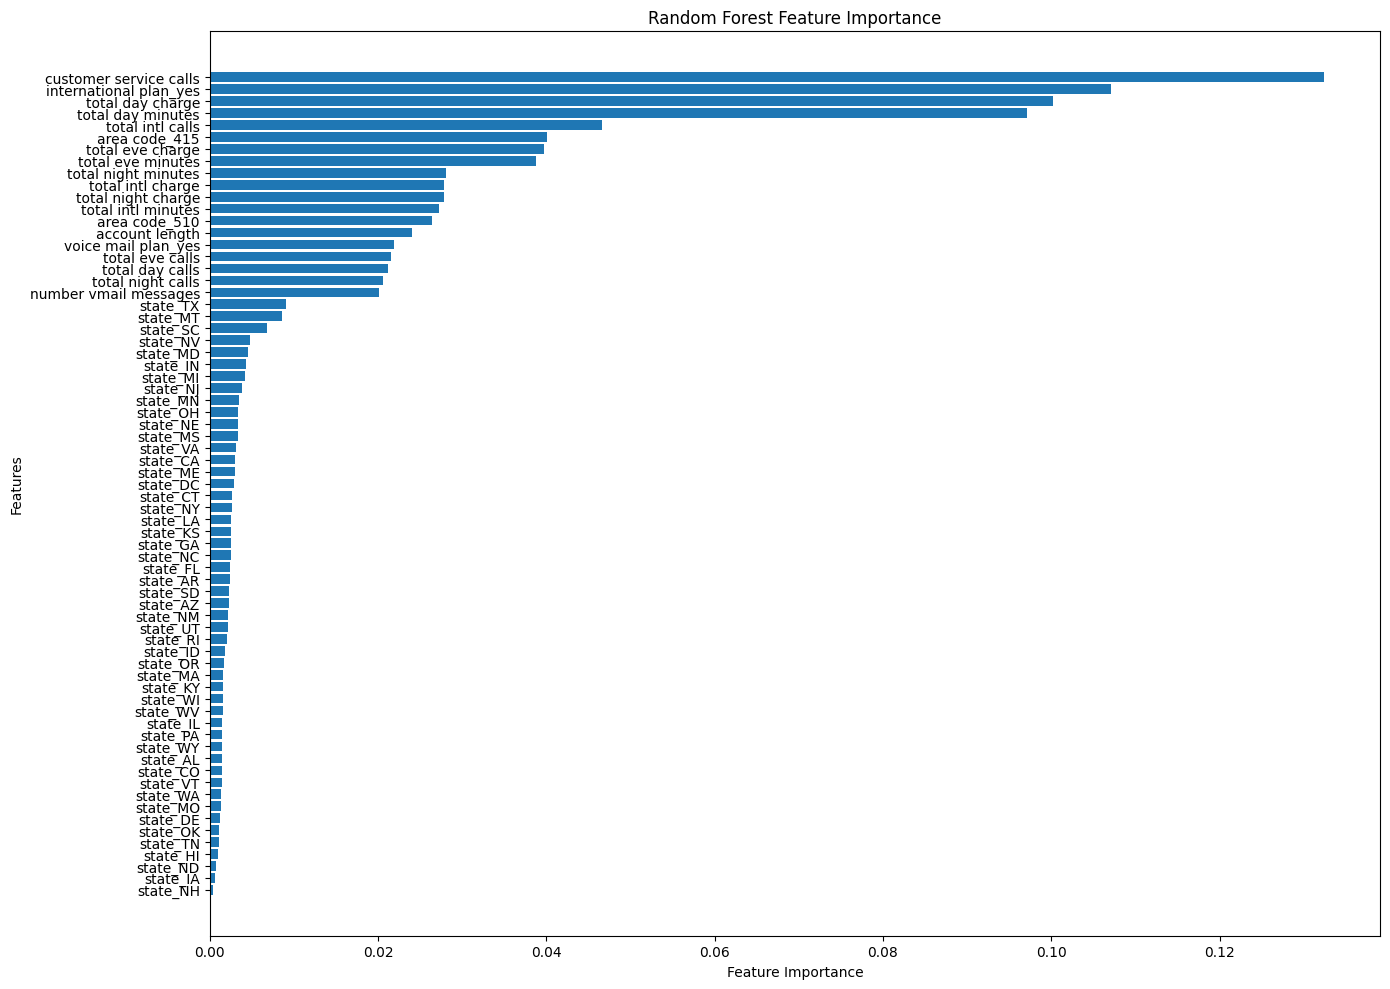

In [152]:
# Get feature importance scores
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Reverse the order to show the most important feature on top
plt.tight_layout()
plt.show()
